# Libraries

In [1]:
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Data visulisation and Data balancing and MetricsLibraries
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from sklearn.metrics import classification_report, confusion_matrix
import glob
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Tensorflow Libraries
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import ResNet50, VGG16, InceptionResNetV2 , MobileNetV2 , ResNet152V2 , DenseNet201 , Xception , InceptionV3 , NASNetLarge
from tensorflow.keras.applications.resnet import preprocess_input
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Weight balancing Libraries
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from distutils.version import LooseVersion
from collections import Counter
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Checking GPU
# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from tensorflow.python.compiler.mlcompute import mlcompute
mlcompute.set_mlc_device(device_name='gpu')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Data Visulisation

In [18]:
import glob
import matplotlib.pyplot as plt
import seaborn as sns
# ------------------------------------------------------------------------------
# Train samples
# ------------------------------------------------------------------------------
akiec = glob.glob('/Users/vivekd/Downloads/d/datatree/train/akiec/*.*')
bcc = glob.glob('/Users/vivekd/Downloads/d/datatree/train/bcc/*.*')
bkl = glob.glob('/Users/vivekd/Downloads/d/datatree/train/bkl/*.*')
df = glob.glob('/Users/vivekd/Downloads/d/datatree/train/df/*.*')
mel = glob.glob('/Users/vivekd/Downloads/d/datatree/train/mel/*.*')
nv = glob.glob('/Users/vivekd/Downloads/d/datatree/train/nv/*.*')
vasc = glob.glob('/Users/vivekd/Downloads/d/datatree/train/vasc/*.*')

# ------------------------------------------------------------------------------
# Val samples
# ------------------------------------------------------------------------------

akiec_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/akiec/*.*')
bcc_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/bcc/*.*')
bkl_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/bkl/*.*')
df_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/df/*.*')
mel_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/mel/*.*')
nv_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/nv/*.*')
vasc_v = glob.glob('/Users/vivekd/Downloads/d/datatree/val/vasc/*.*')

[260, 409, 877, 91, 890, 5362, 111]

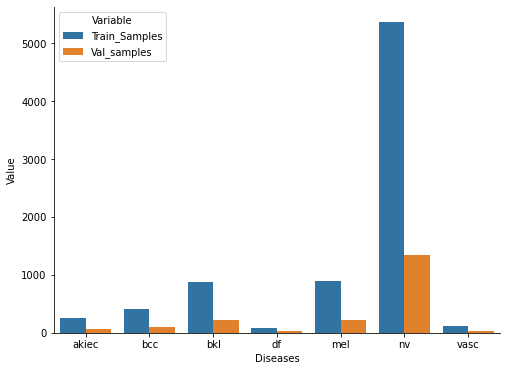

In [19]:
#Train samples [260, 409, 877, 91, 890, 5362, 111]
# Val samples [67, 105, 222, 24, 223, 1343, 31]

df1 = pd.DataFrame({
    'Diseases': ['akiec','bcc','bkl','df','mel','nv','vasc'],
    'Train_Samples': [len(akiec),len(bcc),len(bkl),len(df),len(mel),len(nv),len(vasc)],
    'Val_samples': [len(akiec_v),len(bcc_v),len(bkl_v),len(df_v),len(mel_v),len(nv_v),len(vasc_v)]
})
fig, ax1 = plt.subplots(figsize=(8, 6))
tidy = df1.melt(id_vars='Diseases').rename(columns=str.title)



sns.barplot(x='Diseases', y='Value', hue='Variable', data=tidy, ax=ax1)
sns.despine(fig)

t = [len(akiec),len(bcc),len(bkl),len(df),len(mel),len(nv),len(vasc)]
t

# Method to create custom images

In [219]:
def image_gen(name,disease,train,hflip,vflip,rot,angle,copy):
    
    if train==True:
        augmented_path="/Users/vivekd/Downloads/d/c/train/"+name        
        for i in range(len(disease)):
            img= cv2.imread(disease[i])
            img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            img= cv2.resize(img,(224,224))
            
            
            if copy==True:
                new_image_path= "%s/original_image_%s.jpg" %(augmented_path, i)
                transformed_image = img_as_ubyte(img)  #Convert an image to unsigned byte format, with values in [0, 255].
                transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                cv2.imwrite(new_image_path, transformed_image)
                            

            if hflip==True:
                new_image_path= "%s/hflip_image_%s.jpg" %(augmented_path, i)
                transformed_image= np.fliplr(img)
                transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                cv2.imwrite(new_image_path, transformed_image)

            if vflip==True:
                new_image_path= "%s/vflip_image_%s.jpg" %(augmented_path, i)
                transformed_image= np.flipud(img)
                transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                cv2.imwrite(new_image_path, transformed_image)
                
            if rot==True:
                if angle == 180:
                    new_image_path= "%s/rot180_image_%s.jpg" %(augmented_path, i)
                    transformed_image= rotate(img, angle)
                    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                    cv2.imwrite(new_image_path, transformed_image)
                elif angle == 90:
                    new_image_path= "%s/rot90_image_%s.jpg" %(augmented_path, i)
                    transformed_image= rotate(img, angle)
                    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                    cv2.imwrite(new_image_path, transformed_image)
                elif angle == -90:
                    new_image_path= "%s/rot-90_image_%s.jpg" %(augmented_path, i)
                    transformed_image= rotate(img, angle)
                    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                    cv2.imwrite(new_image_path, transformed_image)

    return 'done'


def val_image_gen(name,disease,val,hflip,vflip,rot,angle,copy):
    
    if val==True:
        augmented_path="/Users/vivekd/Downloads/d/c/val/"+name        
        for i in range(len(disease)):
            img= cv2.imread(disease[i])
            img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            img= cv2.resize(img,(224,224))
            
            
            if copy==True:
                new_image_path= "%s/original_image_%s.jpg" %(augmented_path, i)
                transformed_image = img_as_ubyte(img)  #Convert an image to unsigned byte format, with values in [0, 255].
                transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                cv2.imwrite(new_image_path, transformed_image)
                            

            if hflip==True:
                new_image_path= "%s/hflip_image_%s.jpg" %(augmented_path, i)
                transformed_image= np.fliplr(img)
                transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                cv2.imwrite(new_image_path, transformed_image)

            if vflip==True:
                new_image_path= "%s/vflip_image_%s.jpg" %(augmented_path, i)
                transformed_image= np.flipud(img)
                transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                cv2.imwrite(new_image_path, transformed_image)
                
            if rot==True:
                if angle == 180:
                    new_image_path= "%s/rot180_image_%s.jpg" %(augmented_path, i)
                    transformed_image= rotate(img, angle)
                    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                    cv2.imwrite(new_image_path, transformed_image)
                elif angle == 90:
                    new_image_path= "%s/rot90_image_%s.jpg" %(augmented_path, i)
                    transformed_image= rotate(img, angle)
                    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                    cv2.imwrite(new_image_path, transformed_image)
                elif angle == -90:
                    new_image_path= "%s/rot-90_image_%s.jpg" %(augmented_path, i)
                    transformed_image= rotate(img, angle)
                    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
                    transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
                    cv2.imwrite(new_image_path, transformed_image)
                
                
    return 'done'

# Generating images for val set

In [165]:
image_gen(name='akiec',disease=akiec,copy=True,train=True,hflip=True,vflip=True,rot=True,angle=180)

'done'

In [172]:
image_gen(name='bcc',disease=bcc,copy=True,train=True,hflip=True,vflip=False,rot=False,angle=0)


'done'

In [173]:
image_gen(name='bcc',disease=bcc[:120],copy=False,train=True,hflip=False,vflip=True,rot=False,angle=0)

'done'

In [174]:
image_gen(name='bkl',disease=bkl,copy=True,train=True,hflip=False,vflip=False,rot=False,angle=0)
image_gen(name='bkl',disease=bkl[:100],copy=False,train=True,hflip=True,vflip=True,rot=False,angle=0)

'done'

In [226]:
image_gen(name='df',disease=df,copy=True,train=True,hflip=True,vflip=True,rot=True,angle=180)
image_gen(name='df',disease=df,copy=False,train=True,hflip=False,vflip=False,rot=True,angle=90)
image_gen(name='df',disease=df,copy=False,train=True,hflip=False,vflip=False,rot=True,angle=-90)

'done'

In [181]:
image_gen(name='mel',disease=mel,copy=True,train=True,hflip=False,vflip=False,rot=False,angle=0)
image_gen(name='mel',disease=mel[:100],copy=False,train=True,hflip=True,vflip=False,rot=False,angle=0)



'done'

In [182]:
image_gen(name='nv',disease=nv[:1000],copy=True,train=True,hflip=False,vflip=False,rot=False,angle=0)

'done'

In [225]:
image_gen(name='vasc',disease=vasc,copy=True,train=True,hflip=True,vflip=True,rot=True,angle=180)
image_gen(name='vasc',disease=vasc,copy=False,train=True,hflip=False,vflip=False,rot=True,angle=90)
image_gen(name='vasc',disease=vasc,copy=False,train=True,hflip=False,vflip=False,rot=True,angle=-90)

'done'

# Generating images for val set

In [224]:
val_image_gen(name='akiec',disease=akiec_v,copy=True,val=True,hflip=True,vflip=True,rot=True,angle=180)
val_image_gen(name='akiec',disease=akiec_v,copy=False,val=True,hflip=False,vflip=False,rot=True,angle=90)

'done'

In [208]:
val_image_gen(name='bcc',disease=bcc_v,copy=True,val=True,hflip=True,vflip=True,rot=False,angle=0)

'done'

In [209]:
val_image_gen(name='bkl',disease=bkl_v,copy=True,val=True,hflip=False,vflip=False,rot=False,angle=0)
val_image_gen(name='bkl',disease=bkl_v[:100],copy=False,val=True,hflip=True,vflip=False,rot=False,angle=0)

'done'

In [218]:
val_image_gen(name='df',disease=df_v,copy=True,val=True,hflip=True,vflip=True,rot=True,angle=180)
val_image_gen(name='df',disease=df_v,copy=False,val=True,hflip=False,vflip=False,rot=True,angle=90)
val_image_gen(name='df',disease=df_v,copy=False,val=True,hflip=False,vflip=False,rot=True,angle=-90)

'done'

In [220]:
val_image_gen(name='mel',disease=mel_v,copy=True,val=True,hflip=False,vflip=False,rot=False,angle=0)
val_image_gen(name='mel',disease=mel_v[:100],copy=True,val=True,hflip=True,vflip=False,rot=False,angle=0)





'done'

In [221]:
val_image_gen(name='nv',disease=nv_v[:300],copy=True,val=True,hflip=False,vflip=False,rot=False,angle=0)



'done'

In [222]:
val_image_gen(name='vasc',disease=vasc_v,copy=True,val=True,hflip=True,vflip=True,rot=True,angle=180)
val_image_gen(name='vasc',disease=vasc_v,copy=False,val=True,hflip=False,vflip=False,rot=True,angle=90)
val_image_gen(name='vasc',disease=vasc_v,copy=False,val=True,hflip=False,vflip=False,rot=True,angle=-90)

'done'

# Hyper_parameters

In [43]:
epochs = 20
batch_size = 32
drop_out = 0.5
activation = 'softmax'
classes = 7

# below dunno this are default.
optimizer='adam'

# Data preprocessing

In [44]:
train_dir = "unbalanced_data/train"
test_dir = "unbalanced_data/val"

# dimensions of our images.
img_width, img_height = 224, 224
train_data_dir = train_dir
validation_data_dir = test_dir
nb_train_samples = 8000
nb_validation_samples = 2015



if K.image_data_format() == 'channels_first':
    input_shape = (3 , img_width , img_height)
else:

    input_shape = (img_width,img_height,3)
    
print(input_shape)


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1. / 255,horizontal_flip=True,vertical_flip=True,rotation_range=180)
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')


# Calculate class weights
# counter = Counter(train_generator.classes)
# max_val = float(max(counter.values()))
# class_weights = {class_id: max_val/num_images for class_id, num_images in counter.items()}
# print("class_weights :" + "{0: 20.623076923076923, 1: 13.11002444987775, 2: 6.114025085518814, 3: 58.92307692307692, 4: 6.024719101123596, 5: 1.0, 6: 48.306306306306304}")



from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(train_generator.classes), 
                train_generator.classes)
print(class_weights)

temp = [0,1,2,3,4,5,6]
class_weights = dict(zip(temp, class_weights))

print(class_weights)

print("class weights with sklearn : "  +str(class_weights))


# counter = Counter(train_generator.classes)
# total = float(sum(counter.values()))
# class_weight = {class_id : (1/num_images)*(total)/2.0 for class_id, num_images in counter.items()}

# print(class_weights)



validation_generator = train_datagen.flow_from_directory(
test_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode='categorical')

(224, 224, 3)
Found 8000 images belonging to 7 classes.
[ 4.3956044   2.79427174  1.30314383 12.5588697   1.28410915  0.21314009
 10.2960103 ]
{0: 4.395604395604396, 1: 2.7942717429269996, 2: 1.3031438345007331, 3: 12.558869701726845, 4: 1.2841091492776886, 5: 0.21314008632173495, 6: 10.296010296010296}
class weights with sklearn : {0: 4.395604395604396, 1: 2.7942717429269996, 2: 1.3031438345007331, 3: 12.558869701726845, 4: 1.2841091492776886, 5: 0.21314008632173495, 6: 10.296010296010296}
Found 2015 images belonging to 7 classes.


# Models

In [45]:
def vgg16():
  model1 = Sequential()
  checkpoint = ModelCheckpoint(filepath='7balancing with class_weights/vgg16_sklearnB1.h5', mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)
  callbacks_list = [checkpoint]
  vgg16_model = VGG16(weights='imagenet',include_top=False, input_shape=input_shape)
  model1.add(vgg16_model)
  model1.add(Flatten())
  model1.add(Dropout(drop_out))
  model1.add(Dense(classes,activation = activation))
  model1.layers[0].trainable = False
  model1.summary()
  model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model1.fit(
  train_generator,
  steps_per_epoch=nb_train_samples // batch_size,
  epochs=epochs,
  validation_data=validation_generator,
  class_weight=class_weights,
  validation_steps=nb_validation_samples // batch_size,callbacks = callbacks_list)
    
    
def mobilenet():
  model5= Sequential()
  checkpoint = ModelCheckpoint(filepath='7balancing with class_weights/mobilenet_B1.h5', mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)
  callbacks_list = [checkpoint]
  mobilenet_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=input_shape)
  model5.add(mobilenet_model)
  model5.add(Flatten())
  model5.add(Dropout(drop_out))
  model5.add(Dense(classes,activation = activation))
  model5.layers[0].trainable = False
  model5.summary()
  model5.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model5.fit(
  train_generator,
  steps_per_epoch=nb_train_samples // batch_size,
  epochs=epochs,verbose=1,
  validation_data=validation_generator,
  class_weight=class_weights,
  validation_steps=nb_validation_samples // batch_size,callbacks = callbacks_list)
    
    
def xception():
  model7 = Sequential()
  checkpoint = ModelCheckpoint(filepath='7balancing with class_weights/xception_B1.h5', mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)
  callbacks_list = [checkpoint]
  xception_model = Xception(weights='imagenet',include_top=False, input_shape=input_shape)
  model7.add(xception_model)
  model7.add(Flatten())
  model7.add(Dropout(drop_out))
  model7.add(Dense(classes,activation = activation))
  model7.layers[0].trainable = False
  model7.summary()
  model7.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  model7.fit(
  train_generator,
  steps_per_epoch=nb_train_samples // batch_size,
  epochs=epochs,verbose=1,
  validation_data=validation_generator,
  class_weight=class_weights,
  validation_steps=nb_validation_samples // batch_size,callbacks = callbacks_list)
    
def resnet50():
    model2 = Sequential()
    checkpoint = ModelCheckpoint(filepath='7withoutbalancing/resnet50_WB1.h5', mode='max', monitor='val_accuracy', verbose=2, save_best_only=True)
    callbacks_list = [checkpoint]
    resnet_model = ResNet50(weights='imagenet',include_top=False, input_shape=input_shape)
    model2.add(resnet_model)
    model2.add(Flatten())
    model2.add(Dropout(drop_out))
    model2.add(Dense(classes,activation = activation))
    model2.layers[0].trainable = False
    model2.summary()
    model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    model2.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,callbacks = callbacks_list)


# Training

In [37]:
vgg16()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 175623    
Total params: 14,890,311
Trainable params: 175,623
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
1000/1000 [==============================] - 163s 162ms/step - loss: nan - accuracy: 0.0304 - val_loss: nan - val_accuracy: 0.0334

Epoch 00001: val_accuracy improved from -inf to 0.03337, saving model to 7balancing with cl

In [39]:
mobilenet()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_8 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 62720)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 439047    
Total params: 2,697,031
Trainable params: 439,047
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/20
1000/1000 [==============================] - 69s 67ms/step - loss: nan - accuracy: 0.0315 - val_loss: nan - val_accuracy: 0.0334

Epoch 00001: val_accuracy improved from -inf to 0.03337, saving model to 7balancing with class_

In [40]:
xception()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_9 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 702471    
Total params: 21,563,951
Trainable params: 702,471
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/20
1000/1000 [==============================] - 148s 146ms/step - loss: nan - accuracy: 0.0338 - val_loss: nan - val_accuracy: 0.0334

Epoch 00001: val_accuracy improved from -inf to 0.03337, saving model to 7balancing with cl

In [ ]:
resnet50()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_11 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 100352)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 702471    
Total params: 24,290,183
Trainable params: 702,471
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 873s 3s/step - loss: 1.8843 - accuracy: 0.6543 - val_loss: 1.7189 - val_accuracy: 0.6658

Epoch 00001: val_accuracy improved from -inf to 0.66583, saving model to 7withoutbalancin

In [41]:
vgg16()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 175623    
Total params: 14,890,311
Trainable params: 175,623
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 203s 805ms/step - loss: 1.3063 - accuracy: 0.6247 - val_loss: 0.9441 - val_accuracy: 0.7061

Epoch 00001: val_accuracy improved from -inf to 0.70615, saving model to vgg16_B1.h5
Ep

In [42]:
mobilenet()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
flatten_4 (Flatten)          (None, 62720)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 62720)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 439047    
Total params: 2,697,031
Trainable params: 439,047
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 69s 264ms/step - loss: 5.5992 - accuracy: 0.6219 - val_loss: 18.3686 - val_accuracy: 0.6658

Epoch 00001: val_accuracy improved from -inf to 0.66583, saving model to mobilenet_B1.h5


In [43]:
xception()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_5 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 702471    
Total params: 21,563,951
Trainable params: 702,471
Non-trainable params: 20,861,480
_________________________________________________________________
Epoch 1/20
250/250 [==============================] - 105s 407ms/step - loss: 1.8858 - accuracy: 0.6537 - val_loss: 1.7196 - val_accuracy: 0.6643

Epoch 00001: val_accuracy improved from -inf to 0.66431, saving model to xception_B1.h5

In [12]:
resnet50()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 702471    
Total params: 24,290,183
Trainable params: 702,471
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
782/782 [==============================] - 104s 132ms/step - loss: 16.1224 - accuracy: 0.4185 - val_loss: 28.5702 - val_accuracy: 0.0964

Epoch 00001: val_accuracy improved from -inf to 0.09635, saving model to resnet50_B1.